In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
x_train[0].shape

(28, 28)

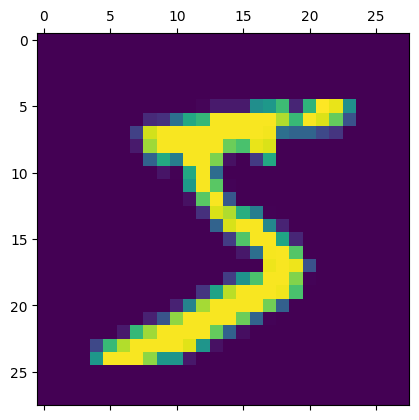

In [9]:
plt.matshow(x_train[0])

In deep learning at first we need to feed the training images to input datas as an one dimentional array. but the images are in 2D (28,28). so we'll reshape the images

In [10]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [12]:
x_train_flatten

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Now we will build the model without any hidden layer. We will just connect all the input layers with the output layers of 10 classes

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 930us/step - accuracy: 0.7670 - loss: 18.2241
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step - accuracy: 0.8771 - loss: 6.1848
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.8832 - loss: 5.6728
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.8872 - loss: 5.4435
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.8872 - loss: 5.3361


you can see higher the epoch is the higher the accuracy gets. 88% accuracy is quite good but it's not enough. we need to have more than 95% accuracy. for that we can scale the inputs. to scale it we will divide the values by 255 because all the images pixels are in range between 0 - 255. after scaling we'll get values from 0 to 1

In [16]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [17]:
x_train_scaled_flatten = x_train_scaled.reshape(len(x_train), 28*28)
x_test_scaled_flatten = x_test_scaled.reshape(len(x_test), 28*28)

In [18]:
x_train_scaled_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
model2 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model2.fit(x_train_scaled_flatten, y_train, epochs=5)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8098 - loss: 0.7207
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9146 - loss: 0.3085
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 973us/step - accuracy: 0.9206 - loss: 0.2850
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9208 - loss: 0.2831
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.9260 - loss: 0.2628


In [25]:
model2.evaluate(x_test_scaled_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.9135 - loss: 0.3057


[0.2709631621837616, 0.9243999719619751]

In [26]:
y_predicted = model2.predict(x_test_scaled_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step


In [28]:
y_predicted[0]

array([2.2690270e-02, 6.0358337e-07, 6.3967757e-02, 9.4576484e-01,
       1.8471543e-03, 1.7903677e-01, 1.6030999e-06, 9.9976069e-01,
       1.4291452e-01, 6.4713454e-01], dtype=float32)

In [30]:
y_test[0]

7

In [29]:
np.argmax(y_predicted[0])

7

In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted ]

In [32]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    2,    2,    0,    8,    9,    2,    3,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   2,    9,  929,   13,    6,    7,   11,    9,   42,    4],
       [   2,    0,   25,  886,    1,   54,    2,    8,   24,    8],
       [   1,    1,    8,    1,  911,    0,   11,    4,   11,   34],
       [   7,    2,    4,   15,    6,  812,   11,    2,   28,    5],
       [   7,    3,    8,    1,    7,   15,  912,    2,    3,    0],
       [   1,    8,   26,    9,    8,    1,    0,  936,    5,   34],
       [   5,    6,    7,   14,    9,   37,    8,    6,  877,    5],
       [   8,    7,    1,    9,   28,   14,    0,   16,    9,  917]])>

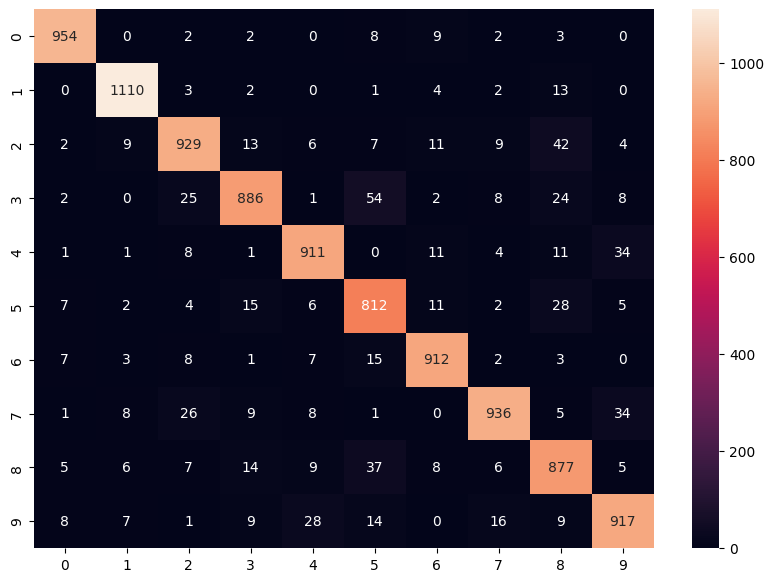

In [33]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.show()


after scaling our accuracy gets to 92%. but we need more. from the heatmap we can see there are 54 wrong prediction in one case and many wrong predictions in other cases. that's why we will input a hidden layer. which will improve our accuracy

In [37]:
model3 = keras.Sequential([

    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # we are adding another dense layer before connecting with output layers to increase the 
                                                                    # nurons. the number 100 is trial end error number you can play with this
    keras.layers.Dense(10, activation='sigmoid')                       
])
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model3.fit(x_train_scaled_flatten, y_train, epochs=5)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8755 - loss: 0.4452
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9612 - loss: 0.1319
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9748 - loss: 0.0863
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9798 - loss: 0.0662
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0490


So after adding a hidden layer we got 98.5% accuracy

In [38]:
model3.evaluate(x_test_scaled_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9698 - loss: 0.0969


[0.08227617293596268, 0.9731000065803528]

In [40]:
y_predicted2 =model3.predict(x_test_scaled_flatten)
y_predicted2

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.1132561e-03, 6.1407867e-05, 5.5139816e-01, ..., 9.9999243e-01,
        1.0141263e-03, 2.3628128e-01],
       [4.4106385e-03, 9.9795032e-01, 9.9999976e-01, ..., 1.2305392e-06,
        7.8862421e-02, 9.2706512e-07],
       [1.7903935e-03, 9.9918050e-01, 1.0016147e-01, ..., 1.6052718e-01,
        8.2478009e-02, 3.3379395e-03],
       ...,
       [1.2907960e-06, 7.6094057e-07, 3.2296048e-06, ..., 5.7929385e-01,
        2.8212333e-01, 9.3852806e-01],
       [1.9386487e-02, 3.6499891e-04, 3.1207714e-04, ..., 3.9224695e-02,
        9.6872389e-01, 3.2878099e-05],
       [3.1867915e-01, 8.8879222e-04, 8.2864714e-01, ..., 7.8510777e-05,
        2.2975195e-03, 1.0721464e-02]], dtype=float32)

In [41]:
y_predicted2_labels = [np.argmax(i) for i in y_predicted2]

In [42]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted2_labels)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    2,    2,    2,    2,    1,    1,    1,    1],
       [   0, 1123,    4,    1,    0,    1,    2,    1,    3,    0],
       [   1,    0, 1012,    3,    5,    0,    2,    5,    3,    1],
       [   2,    0,    7,  980,    1,    7,    0,    6,    2,    5],
       [   1,    0,    1,    0,  962,    0,    3,    2,    0,   13],
       [   4,    2,    0,   15,    0,  857,    6,    1,    4,    3],
       [   7,    4,    4,    1,    4,    4,  933,    1,    0,    0],
       [   1,    5,   10,    4,    1,    0,    0, 1001,    1,    5],
       [   4,    0,    6,   20,    5,    5,    4,    4,  918,    8],
       [   1,    3,    0,    5,   12,    4,    0,    6,    1,  977]])>

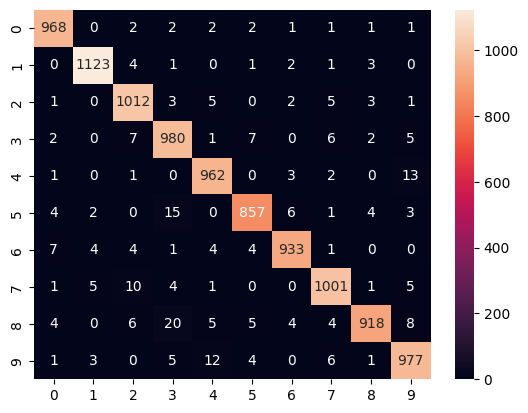

In [43]:
sns.heatmap(cm2, annot = True, fmt='d')
plt.show()

Even though there are flaws, it's better than ever. remeber life is not perfect. and no machine can give 100% accuracy

we can see we need to faltten the input imagess every time. it's tedious. that's why we'll use the flatten function of keras

In [45]:
model3 = keras.Sequential([

    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')                       
])
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model3.fit(x_train_scaled, y_train, epochs=5)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8688 - loss: 0.4577
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9612 - loss: 0.1309
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9741 - loss: 0.0879
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9805 - loss: 0.0641
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9847 - loss: 0.0491
